<a href="https://colab.research.google.com/github/ttnok/c-programming-on-colab/blob/main/%E6%96%87%E5%AD%97%E3%82%B3%E3%83%BC%E3%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # 変換指定子 `%c` と文字コード

※ `%c` は教科書 p.82 で登場します。

以前説明したように、コンピュータのメモリというのは膨大な数のトグルスイッチ群であり、こうした仕組みを利用して様々なデータが表現、処理、保持されます。
われわれがこうしてモニタ上に見ている文字も、メモリ上ではトグルスイッチの並びとなっているわけです。

また、各スイッチはビットと呼ばれ、8 つのビットがまとまって管理されるということも思い出しておきましょう。
この管理単位の 8 つのビットは 1 バイトと呼ばれるのでした。そして、各バイトにはアドレスが振られています。

このノートブックでは、文字に対応するバイトの数値、つまり **文字コード** を実際にみてみます。

文字コードに対応する文字を表示するプログラム

In [ ]:
%%file char-code.c
#include <stdio.h>

int main(void)
{
    printf("%c%c%c%c", 65, 66, 67, 68);  // 教科書 p.60、pp.204-205 

    return 0;
}

In [ ]:
!clang char-code.c && ./a.out

printf 関数の第 2 引数以降は、文字コードを入力します。
変換指定子 `%c` で、その文字コードに対応する文字が表示されます。

文字コード表は教科書の 204 ページ以降に掲載されています。

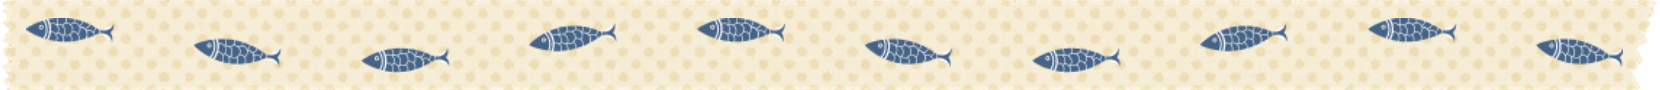

## ascii コード一覧を見るコマンド `ascii`

文字コードは上記のように、教科書の表を参照してもいいのですが、それが手元にないときは、ネット検索するか（たとえば [Wikipedia: ASCII](https://ja.wikipedia.org/wiki/ASCII) ）、あるいは既存のコマンドを利用してもよいです。

ここでは、Linux などの OS で利用できる `ascii` コマンドを紹介しておきます。

In [ ]:
!apt install ascii  # Colab にはインストールされていないので、インストール

In [ ]:
!ascii -d

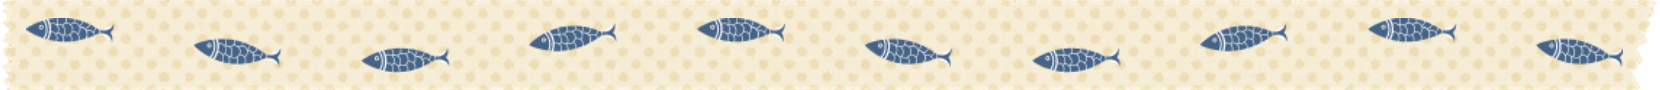

## テキストファイル内の文字のコードを見るコマンド `od`

以上で、文字コードから文字を表示させることはできました。

逆に、文字から文字コードを知るのに、表から探し出すのは面倒です。
テキストファイルに入力された文字のコードを直接みてしまいましょう。

まず、テキストファイルを作成します。

In [ ]:
%%file moji.txt
ABCD

`od` コマンドでそのファイルの各バイトの数値を表示させます。

ここでは各バイトを 10 進数で表示させています（0 から 255 の数値となります）。

In [ ]:
!od -t u1 moji.txt

0000000  65  66  67  68
0000004


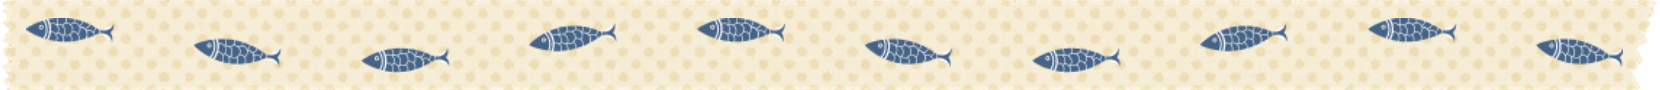

## 改行文字という文字

文字コードは、われわれの目に見える文字だけでなく、制御用の文字や空白などにも当てられています。

たとえば、文字コード 32 は半角空白で、改行は 10 です（Windows は 13 10 で、Mac は 13 です）。

In [35]:
%%file kaigyou.txt
A
BC
D E

Overwriting kaigyou.txt


In [36]:
!od -t u1 kaigyou.txt

0000000  65  10  66  67  10  68  32  69
0000010


In [ ]:
%%file kaigyou.c
#include <stdio.h>

int main(void)
{
    printf("%c%c%c%c", 65, 10, 66, 67);

    return 0;
}

Overwriting char-code.c


In [ ]:
!clang kaigyou.c && ./a.out

A
BC

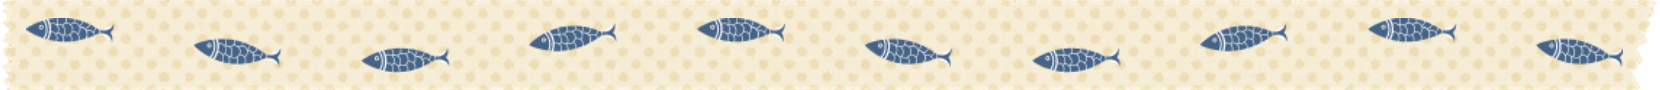

## UTF-8

Unicode という世界中で使用されている膨大な文字テーブルが国際規格として定められています。
これを実際にコンピュータに使用できる形でコード化する（すなわち、バイトの並びで表す）ための方式は、いろいろとあるのですが現在広く用いられているのが UTF-8 という方式です。

授業で用いているコンパイラ clang は内部の処理方式が UTF-8 ですし、この Colab の出力形式も UTF-8 です。

UTF-8 の特徴として、文字に当てられるバイト列の長さは可変であるということです。文字によって長さが違います（1 から 4 バイト）。
たとえば、半角アルファベットなどは 1 バイトで表されますが、平仮名は 3 バイト、絵文字の🌸は 4 バイトです。

これを実際に見てみるには先ほどの方法を利用すればいいです。
やってみましょう。

In [19]:
%%file utf8.txt
あ
a
🌸

Overwriting utf8.txt


In [20]:
!od -t u1 utf8.txt

0000000 227 129 130  10  97  10 240 159 140 184  10 226 145 160
0000016


In [17]:
%%file utf8.c
#include <stdio.h>

int main(void)
{
    printf("%c%c%c%c", 227, 129, 130, 10);
    printf("%c%c", 97, 10);
    printf("%c%c%c%c%c", 240, 159, 140, 184, 10);

    return 0;
}

Overwriting utf8.c


In [18]:
!clang utf8.c && ./a.out

あ
a
🌸


### おまけ

cf. https://qiita.com/_sobataro/items/47989ee4b573e0c2adfc

In [31]:
%%file utf8-combined.c
#include <stdio.h>

int main(void)
{
    printf("%c", 49);                 // 数字の 1
    printf("%c%c%c", 239, 184, 143);  // 結合させるための特殊コード（VARIATION SELECTOR-16）
    printf("%c%c%c", 226, 131, 163);  // 囲み記号（COMBINING ENCLOSING KEYCAP）

    return 0;
}

Overwriting utf8-combined.c


In [32]:
!clang utf8-combined.c && ./a.out

1️⃣

四角で囲まれた 1 という数字が表示されるはずです。

※ フォントの設定によっては見えないかもしれません。